In [17]:
from ftplib import FTP
ftp = FTP('ftp.ecmwf.int')
ftp.login("safer", "neo2008")
ftp.cwd("for_StevenGong")
ftp.dir()


drwxr-xr-x    2 15066      500               185 Jan 29 16:39 .
drwxr-xr-x   67 15066      500                86 Feb  2 12:05 ..
-rwxr-xr-x    1 15066      500            830320 Jan 24 17:21 Qgis_World_outlet_201901_20190125.csv
-rwxr-xr-x    1 15066      500          96368640 Jan 29 11:33 glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_200501.tar
-rwxr-xr-x    1 15066      500          85667840 Jan 29 11:33 glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_200502.tar
-rwxr-xr-x    1 15066      500          96757760 Jan 29 11:33 glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_200503.tar
-rwxr-xr-x    1 15066      500          97617920 Jan 29 11:33 glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_200504.tar
-rwxr-xr-x    1 15066      500          97986560 Jan 29 11:34 glofas2.1

In [18]:
import os

for i in range(1,13):
    if i < 10:
        i = '0' + str(i)
        
    else:
        i = str(i)
        
    filename = "2017" + i + ".tar"
    
    originalFileName = 'RETR glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_2017' + i + '.tar'
    print(filename)
    print(originalFileName)
    
    local_filename = os.path.join("/mnt/bucket/stuarts_files/ensemble_forecasts/", filename)
    with open(local_filename, 'wb') as fp:
        ftp.retrbinary(originalFileName, fp.write)



201701.tar
RETR glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_201701.tar
201702.tar
RETR glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_201702.tar
201703.tar
RETR glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_201703.tar
201704.tar
RETR glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_201704.tar
201705.tar
RETR glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_201705.tar
201706.tar
RETR glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_201706.tar
201707.tar
RETR glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_197901_201712_20190125_201707.tar
201708.tar
RETR glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_newobs_stat6122_19

In [19]:
import tarfile

for i in range(1,13):
    if i < 10:
        i = "0" + str(i)
        
    else:
        i = str(i)
    
    fname = "/mnt/bucket/stuarts_files/ensemble_forecasts/2017" + i +".tar"

    tar = tarfile.open(fname, "r:")
    tar.extractall(path="/mnt/bucket/stuarts_files/ensemble_forecasts/")
    tar.close()

In [68]:
import xarray as xr

sample2017 = xr.open_mfdataset("/mnt/bucket/stuarts_files/ensemble_forecasts/glofas2.1_*.nc", combine="nested", concat_dim="time")


In [71]:
sample2017

<xarray.Dataset>
Dimensions:   (ensemble: 11, time: 3224, x: 6122)
Coordinates:
  * ensemble  (ensemble) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time      (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2018-01-26
Dimensions without coordinates: x
Data variables:
    dis       (time, ensemble, x) float32 dask.array<chunksize=(31, 11, 6122), meta=np.ndarray>
    gcol      (time, x) int32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    glat      (time, x) float32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    glon      (time, x) float32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    grow      (time, x) int32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    gups      (time, x) float32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    lat       (time, x) float32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    ldd       (time, x) int16 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    lon       (time, x) float32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    rl2       (time, x) float32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    rl20      (time, x) float32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    rl5       (time, x) float32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
    ups       (time, x) float32 dask.array<chunksize=(31, 6122), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.6.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Tue Jan 28 10:03:34 2020: ncks -x -v obsdis /vol/glofas/glo...
    CDO:          Climate Data Operators version 1.6.4 (http://code.zmaw.de/p...
    NCO:          netCDF Operators version 4.7.8 (Homepage = http://nco.sf.ne...

In [74]:
sample = xr.open_dataset("/mnt/bucket/stuarts_files/ensemble_forecasts/glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_points_noobs_2017121300_newobs_stat6122_197901_201712_20190125.nc")

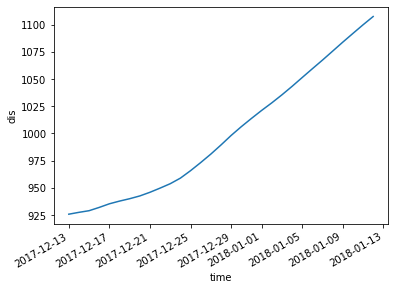

In [75]:
sample.mean('x').mean('ensemble').dis.plot()

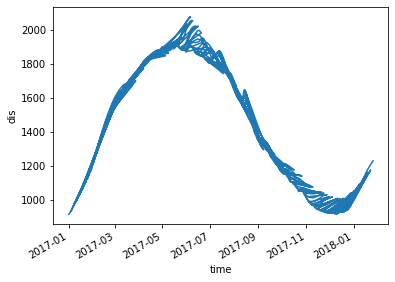

In [76]:
sample2017.mean('x').mean('ensemble').dis.plot()

/root/miniconda3/envs/main/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


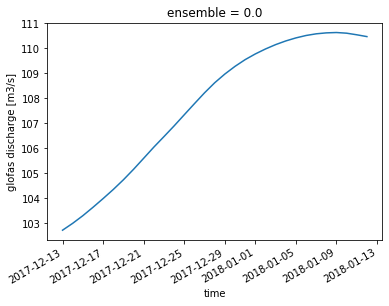

In [35]:
sample.dis.isel(x=1).isel(ensemble=0).plot()

In [ ]:
reshape_data = xr.DataArray(sample2017.dis.values, dims=("ensemble","longitude", "latitude", "time"), coords={'longitude': sample2017})

In [80]:
sample2017.dis.values.shape
#time, ensemble, points

(3224, 11, 6122)

In [88]:
len(sample2017.lon.values[0])

6122

In [89]:
len(sample2017.lat.values[0])

6122

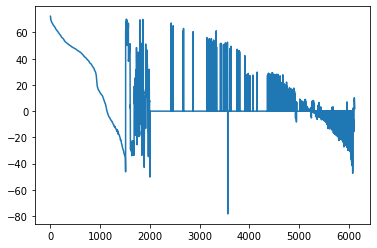

In [92]:
import matplotlib.pyplot as plt
plt.plot(sample2017.lat.values[0])

In [101]:
ensemble1 = sample.isel(ensemble=0)
ensemble1

<xarray.Dataset>
Dimensions:   (time: 31, x: 6122)
Coordinates:
    ensemble  float64 0.0
  * time      (time) datetime64[ns] 2017-12-13 2017-12-14 ... 2018-01-12
Dimensions without coordinates: x
Data variables:
    dis       (time, x) float32 7050.5474 102.71362 ... 231.57571 158.26968
    gcol      (x) int32 3067 3033 2940 2821 3160 ... 1048 1046 1044 1043 1041
    glat      (x) float32 72.25 72.15 71.95 71.95 70.75 ... 2.95 2.45 2.25 2.05
    glon      (x) float32 126.75 123.35 114.05 102.15 ... -75.55 -75.65 -75.85
    grow      (x) int32 177 178 180 180 192 191 205 ... 848 866 870 875 877 879
    gups      (x) float32 2443690.0 218622.0 86783.0 ... 12121.0 5937.0 3587.0
    lat       (x) float32 72.37 72.12 71.98 71.98 ... 2.462211 2.232254 2.05368
    ldd       (x) int16 7 7 7 6 6 7 6 6 6 6 8 8 6 ... 4 6 6 8 7 8 8 8 8 9 8 8 9
    lon       (x) float32 126.8 123.22 114.057 ... -75.651276 -75.85188
    rl2       (x) float32 24746.889 4884.5176 2767.5288 ... 857.55865 455.68985
    rl20      (x) float32 39911.9 10427.521 6114.3057 ... 1424.4802 826.72424
    rl5       (x) float32 31348.475 7297.481 4224.4375 ... 1104.3492 617.2074
    ups       (x) float32 2460000.0 198000.0 78800.0 ... 11728.0 5408.0 3541.0
Attributes:
    CDI:          Climate Data Interface version 1.6.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Tue Jan 28 10:04:58 2020: ncks -x -v obsdis /vol/glofas/glo...
    CDO:          Climate Data Operators version 1.6.4 (http://code.zmaw.de/p...
    NCO:          netCDF Operators version 4.7.8 (Homepage = http://nco.sf.ne...

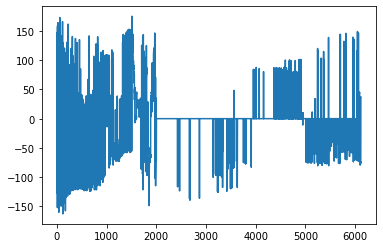

In [102]:
plt.plot(ensemble1.lon)